# High dimensional problems 

## 1) High dimensional problems in the regression context

In the context of regression, dimensionality is the ratio of p, the number of variables, to n, the number of observations. A statistical problem is high-dimensional when the ratio of the number of variables relative to the number of observations is high. High dimensionality is problematic in the regression setting because it reduces prediction accuracy by overfitting to training data (because of the lack of observations per variable). Because a high dimensional regression problem increases the complexity of the model, sound inferences about the effect of a given variable on y difficult. Subset selection, shrinkage models, and principal components analyses can help to form a simpler model that still explains the variance in y. 


## 2) Dealing with the curse of dimensionality

**Subset selection** Subset selection deals with the curse of dimensionality by examining a bias adjusted measure of model fit (AIC, BIC, Mallow's CP) for all possible combinations of predictors. For example, if we begin with a model with 5 predictors, subset selection will calculate the adjusted model fit for all $5!$ possible predictor combinations, plus the null, intercept-only model, and select the one with the best adjusted fit. This is a computationally intensive process most likely not suited to extremely high dimensional datasets.   <br>
**Shrinkage models (ridge regression and LASSO)** Ridge regression penalizes weak regression coefficients by minimizing their weights using a shrinkage penalty called the l2 norm, which scales the squared value of the regression coefficients. As a result, this functionally removes their influence on the residual sum of squares, but the coefficients never reach 0. As the shrinkage penalty increases (by tuning lambda), the magnitude of the estimated coeffecients decreases. In contrast, LASSO reduces the dimensionality of a model by actually removing weak predictors from the model. LASSO accomplishes this by using the L1 norm instead, which scales the absolute value of the regression coefficients, allowing them to reach zero and drop from the model altogether. <br>
**Dimensionality reduction approaches** Dimensionality reduction methods reduce the dimensionality of a model by projecting $m$ predictor variables into a lower-dimensional space. For example, Principal Component Regression first projects your data $X$ into a new n x p matrix $Z$, where all variables in $Z$ are perfectly orthogonal to each other. Then it finds the $m$ components of $Z$ which explain the most variance in the data and uses $Z$ intead of the original predictors in a regression model. Increasing $m$ increases the flexibility (variance) of the model. This approach is unlike subset selection because models are not compared to one another, and different from shrinkage models because no penalty is applied to the uninformative predictors. 

## 3) The bias-variance tradeoff 

a) **iii** The LASSO is less flexible than least squares because it performs feature selection, which reduces the complexity of the model.

b) **iii** While ridge regression is more flexible than LASSO, it is less flexible than least squares because it penalizes weak coefficients by scaling them by their squared value.

c) **iii** Principal Component Regression is also less flexible than least squares because it minimizes the $m$ components of orthogonalized data to explain the maximum variance in y. In this way, it reduces the complexity of the model. 

The procedure for all of these high dimensionality methods is unlike least squares, which just provides estimates of the coefficients for the predictors given and makes no attempt to minimize model complexity.



## ISLR 6.8

In [56]:
library(tidyverse)
#a) 
set.seed(042518)
x <- rnorm(100)
eps <- rnorm(100)

In [57]:
#b) 
b0 <- 11
b1 <- 23
b2 <- 58
b3 <- 13

y <- b0 + b1*x + b2*(x^2) + b3 *(x^3) + eps

In [60]:
#c) 
library(leaps)
df <- data.frame(x, x^2, x^3, x^4, x^5, x^6, x^7, x^8, x^9, x^10, y)
nvmax = ncol(select(df, -y))
regfit.full = regsubsets(y ~., df, nvmax = nvmax)
reg.summary <- summary(regfit.full)

[1] "Number of variables in the best model using BIC: 3"

[1] "Number of variables in the best model using Mallow's C_p: 3"

[1] "Number of variables in the best model using adjusted R^2: 4"

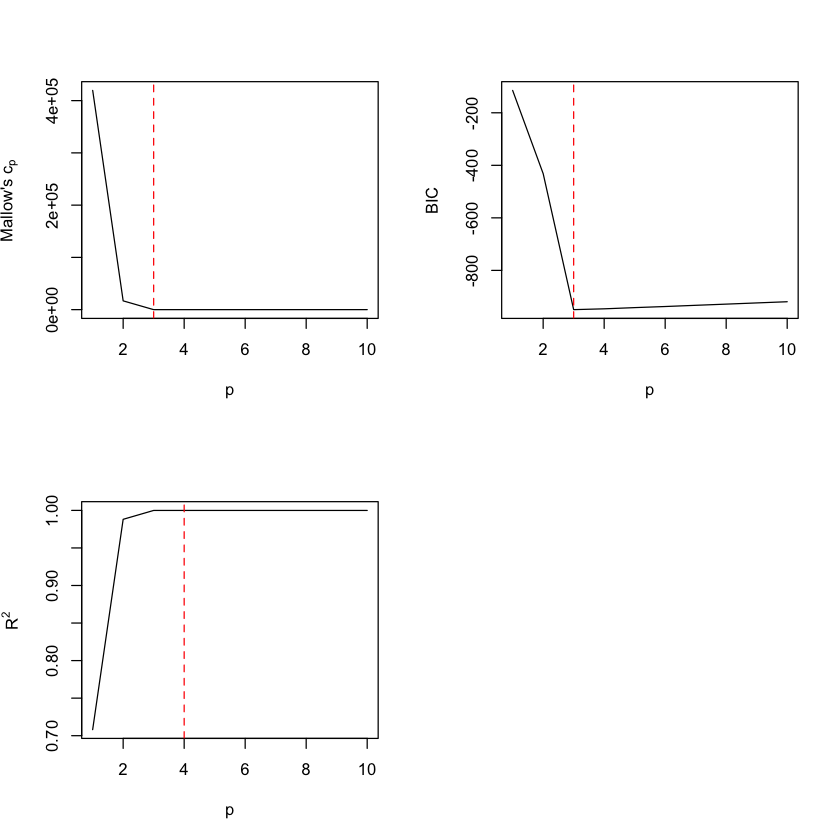

In [61]:
par(mfrow = c(2,2))

plot(reg.summary$cp, xlab = "p", ylab = expression("Mallow's c"[p]), type = "l")
abline(v=which.min(reg.summary$cp),col="red", lty=2)

plot(reg.summary$bic, xlab = "p", ylab = "BIC", type = "l")
abline(v=which.min(reg.summary$bic),col="red", lty=2)

plot(reg.summary$adjr2, xlab = "p", ylab = expression(R^2), type = "l")
abline(v=which.max(reg.summary$adjr2),col="red", lty=2)

paste0("Number of variables in the best model using BIC: ", which.min(reg.summary$bic))
paste0("Number of variables in the best model using Mallow's C_p: ", which.min(reg.summary$cp))
paste0("Number of variables in the best model using adjusted R^2: ", which.max(reg.summary$adjr2))

In [62]:
#coefficients for best model (by consensus) 
#quite accurate. 
coef(regfit.full, 3)

(Intercept)           x         x.2         x.3 
   10.73912    23.03492    58.04483    12.99838

The consensus for the best model obtained has the three original predictors and the estimates above are close to the generative betas (it's the fibonacci sequence!): 

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x + \hat{\beta}_2x^2 + \hat{\beta}_3x^3 + \epsilon$$


In [63]:
#d)
#forward stepwise selection 
regfit.forward = regsubsets(y ~., df, nvmax = nvmax, method = "forward")
forward.summary <- summary(regfit.forward)
#backward stepwise selection 
regfit.backward = regsubsets(y ~., df, nvmax = nvmax, method = "backward")
backward.summary <- summary(regfit.backward)

[1] "Number of variables in the best model using BIC: 3"

[1] "Number of variables in the best model using Mallow's C_p: 3"

[1] "Number of variables in the best model using adjusted R^2: 4"

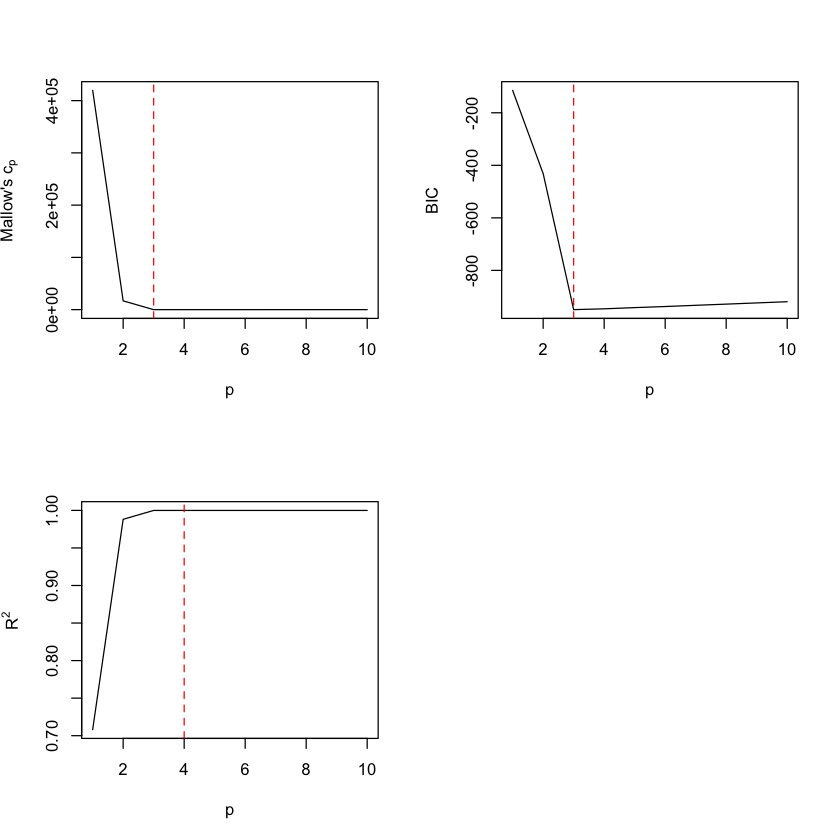

In [64]:
par(mfrow = c(2,2))

plot(forward.summary$cp,  xlab = "p", ylab = expression("Mallow's c"[p]), type = "l")
abline(v=which.min(forward.summary$cp),col="red", lty=2)

plot(forward.summary$bic, xlab = "p", ylab = "BIC", type = "l")
abline(v=which.min(forward.summary$bic),col="red", lty=2)

plot(forward.summary$adjr2, xlab = "p", ylab = expression(R^2), type = "l")
abline(v=which.max(forward.summary$adjr2),col="red", lty=2)

paste0("Number of variables in the best model using BIC: ", which.min(forward.summary$bic))
paste0("Number of variables in the best model using Mallow's C_p: ", which.min(forward.summary$cp))
paste0("Number of variables in the best model using adjusted R^2: ", which.max(forward.summary$adjr2))

[1] "Number of variables in the best model using BIC: 3"

[1] "Number of variables in the best model using Mallow's C_p: 3"

[1] "Number of variables in the best model using adjusted R^2: 4"

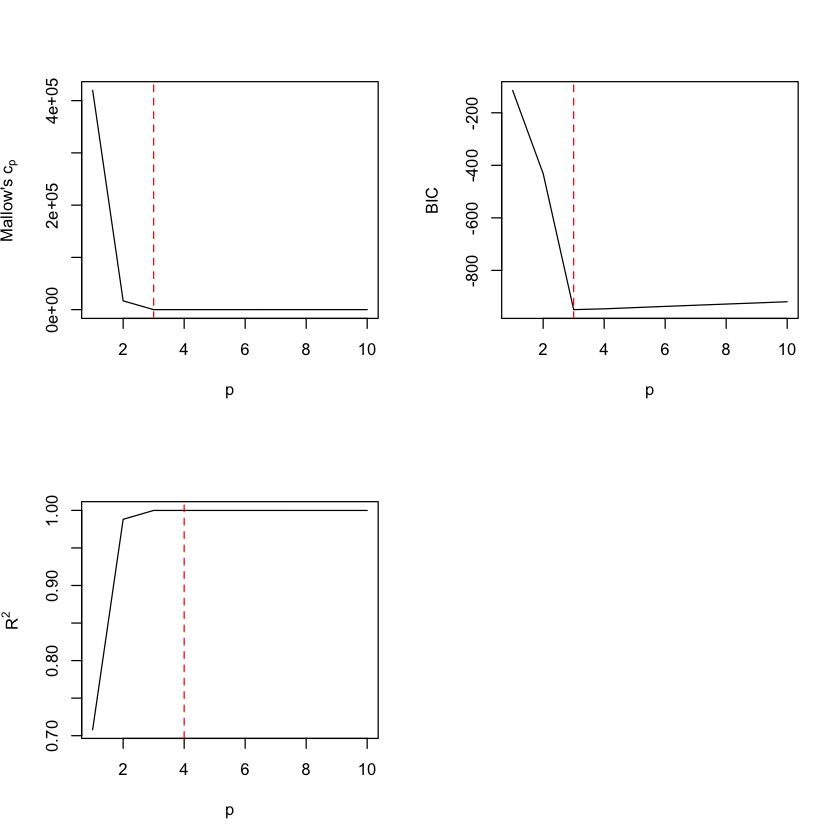

In [10]:
par(mfrow = c(2,2))

plot(backward.summary$cp,  xlab = "p", ylab = expression("Mallow's c"[p]), type = "l")
abline(v=which.min(backward.summary$cp),col="red", lty=2)

plot(backward.summary$bic, xlab = "p", ylab = "BIC", type = "l")
abline(v=which.min(backward.summary$bic),col="red", lty=2)

plot(backward.summary$adjr2, xlab = "p", ylab = expression(R^2), type = "l")
abline(v=which.max(backward.summary$adjr2),col="red", lty=2)

paste0("Number of variables in the best model using BIC: ", which.min(backward.summary$bic))
paste0("Number of variables in the best model using Mallow's C_p: ", which.min(backward.summary$cp))
paste0("Number of variables in the best model using adjusted R^2: ", which.max(backward.summary$adjr2))

In [65]:
coef(regfit.full, 3); coef(regfit.forward, 3); coef(regfit.backward, 3)

(Intercept)           x         x.2         x.3 
   10.73912    23.03492    58.04483    12.99838

(Intercept)           x         x.2         x.3 
   10.73912    23.03492    58.04483    12.99838

(Intercept)           x         x.2         x.3 
   10.73912    23.03492    58.04483    12.99838

The results of all three methods of model selection are unanimous: a model with 3 predictors (x, x^2, x^3 + intercept) is best. 

[1] "Best cross-validated lambda: 2.79478516495713"

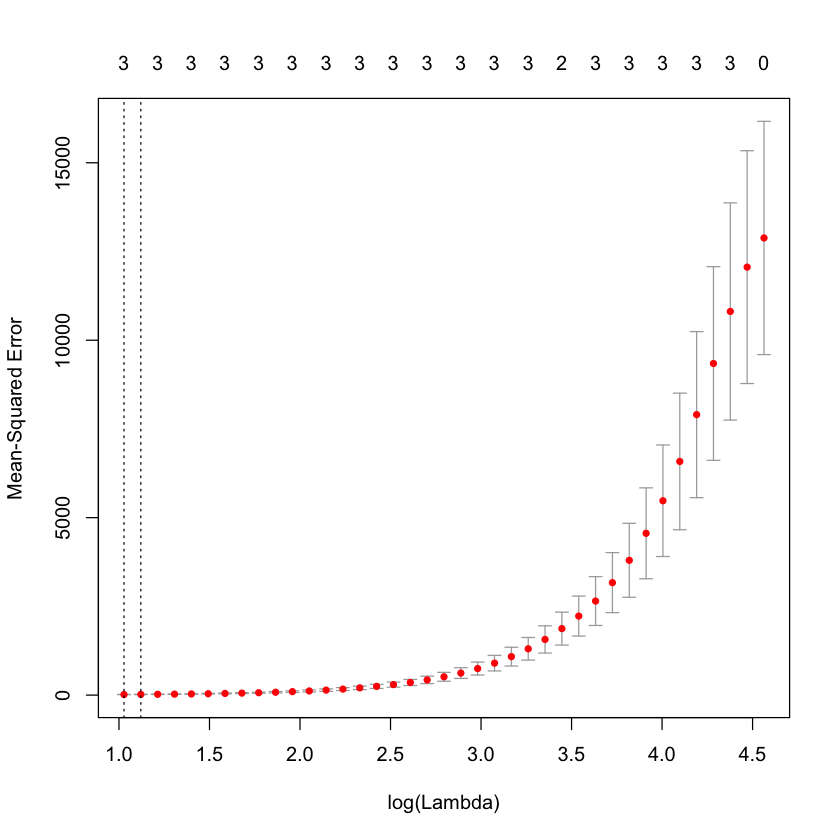

In [67]:
#e)
library(glmnet)
x = model.matrix(y ~., df)[,-1]

set.seed(1)
train_idx = sample(1:nrow(x), nrow(x)/2, replace=0)
test_idx = (-train_idx)

cv_lasso_lam = cv.glmnet(x, y, alpha=1)
plot(cv_lasso_lam)
best_lasso_lam = cv_lasso_lam$lambda.min
paste0("Best cross-validated lambda: ", best_lasso_lam)

In [68]:
lasso.mod = glmnet(x[test_idx,], y[test_idx], alpha = 1, lambda = best_lasso_lam)
lasso.pred <- predict(lasso.mod, type="coefficients", s=best_lasso_lam)[1:nvmax,]

The LASSO method selects predictors $x$, $x^2$, $x^3$ + the intercept.

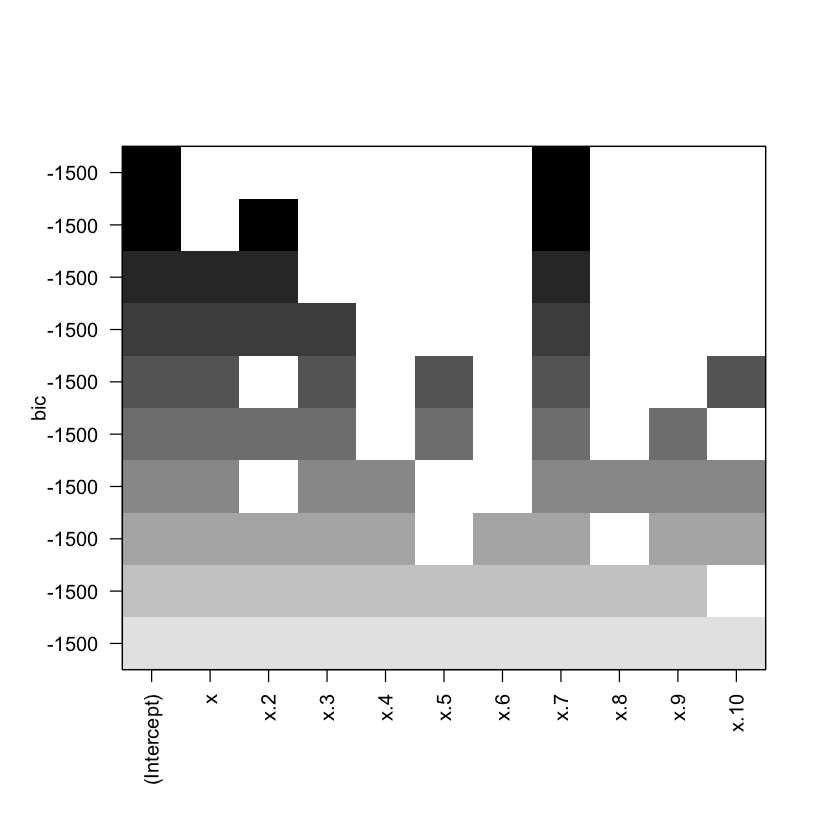

In [69]:
#f) 
x <- rnorm(100)
eps <- rnorm(100)
b7 <- 50
y <- b0 + b7*(x^7) + eps
df <- data.frame(x, x^2, x^3, x^4, x^5, x^6, x^7, x^8, x^9, x^10, y)
nvmax = ncol(select(df, -y))
regfit.full = regsubsets(y ~., df, nvmax = nvmax)
reg.summary <- summary(regfit.full)
plot(regfit.full)

[1] "Best cross-validated lambda: 11.3051641551175"

(Intercept)           x         x.2         x.3         x.4         x.5 
  14.440269    0.000000    0.000000    0.000000    0.000000   29.514487 
        x.6         x.7         x.8         x.9 
   0.000000   34.219208    0.000000    1.911955

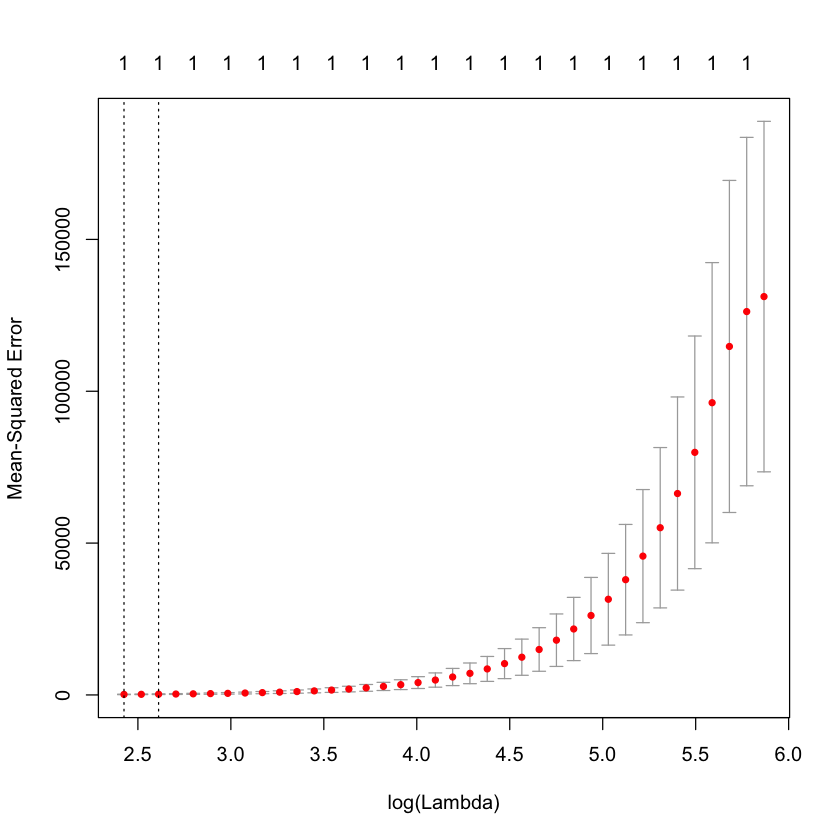

In [70]:
set.seed(1)
x = model.matrix(y ~., df)[,-1]
train_idx = sample(1:nrow(x), nrow(x)/2, replace=0)
test_idx = (-train_idx)

cv_lasso_lam = cv.glmnet(x[train_idx,], y[train_idx], alpha=1)
plot(cv_lasso_lam)
best_lasso_lam = cv_lasso_lam$lambda.min
paste0("Best cross-validated lambda: ", best_lasso_lam)

lasso.mod = glmnet(x, y, alpha = 1, lambda = best_lasso_lam)
predict(lasso.mod, type="coefficients", s=best_lasso_lam)[1:nvmax,]

In [71]:
coef(regfit.full, 3)

(Intercept)           x         x.2         x.7 
 10.9450228   0.0785311   0.1299608  49.9967581

LASSO recovers the predictors from the generative model, but best subset selection includes some predictors that aren't necessary. This suggests that best subset selection has a greater degree of variance than LASSO, and may tend to overfit to the training data relative to LASSO.

## ISLR 6.9

In [72]:
library(ISLR)
str(College)
attach(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

The following objects are masked from College (pos = 7):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc



In [73]:
#a) 
set.seed(1)
total_samples <- nrow(College)
train_prop <- .5
training_n_samples <- train_prop*total_samples
train_idx <- sample(total_samples, training_n_samples, replace = 0)
training_samples <- College[train_idx,]
test_samples <- College[-train_idx,]
head(training_samples); head(test_samples)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Fort Lewis College,No,3440,2823,1123,16,35,3793,486,6198,3320,500,2500,89,97,19.1,6,4362,46
Kansas State University,No,5880,4075,2833,25,55,14914,2246,6995,3120,600,2000,76,86,18.5,22,6122,54
Pacific University,Yes,943,849,288,41,71,1041,35,14210,3994,450,1100,76,76,10.9,22,11216,42
University of Wyoming,No,2029,1516,1073,23,46,7535,1488,5988,3422,600,1500,91,94,15.1,13,8745,45
D'Youville College,Yes,866,619,157,18,47,1074,336,8920,4310,680,1320,68,68,14.6,42,6898,46
University of Virginia,No,15849,5384,2678,74,95,11278,114,12212,3792,500,1000,90,92,9.5,22,13597,95


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [74]:
lm.fit = lm(Apps~., data=College[train_idx,])
#predict the value of the market 
lm.pred <- predict(lm.fit, test_samples)
summary(lm.fit)


Call:
lm(formula = Apps ~ ., data = College[train_idx, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-5276.1  -473.2   -63.9   351.9  6574.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   78.15204  600.84427   0.130 0.896581    
PrivateYes  -757.22843  205.47577  -3.685 0.000263 ***
Accept         1.67981    0.05196  32.329  < 2e-16 ***
Enroll        -0.62380    0.27629  -2.258 0.024544 *  
Top10perc     67.45654    8.45231   7.981 1.84e-14 ***
Top25perc    -22.37500    6.57093  -3.405 0.000734 ***
F.Undergrad   -0.06126    0.05468  -1.120 0.263258    
P.Undergrad    0.04745    0.06248   0.760 0.448024    
Outstate      -0.09227    0.02889  -3.194 0.001524 ** 
Room.Board     0.24513    0.07300   3.358 0.000867 ***
Books          0.09086    0.36826   0.247 0.805254    
Personal       0.05886    0.09260   0.636 0.525455    
PhD           -8.89027    7.20890  -1.233 0.218271    
Terminal      -1.71947    8.22589  -0.209 0.834539    
S.F.Rat

In [75]:
paste0('lm test error:', (ls_test_err <- mean((lm.pred - test_samples$Apps)^2)))

[1] "lm test error:1108531.26304645"

In [76]:
#c) 
library(glmnet)
x = model.matrix(Apps~., College)[,-1]
y = College$Apps

[1] 450.7435

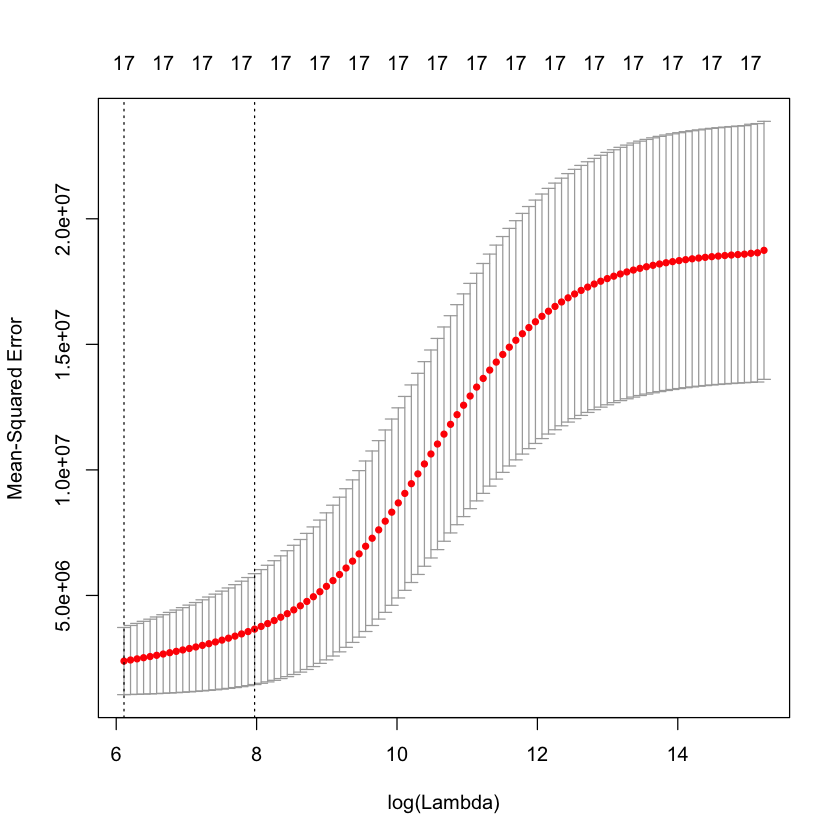

In [77]:
#d)
x = model.matrix(Apps~., College)[,-1]
y = College$Apps
set.seed(1)
cv.out = cv.glmnet(x[train_idx,], y[train_idx], alpha=0)
plot(cv.out)
(bestlam = cv.out$lambda.min)

In [78]:
ridge.mod = glmnet(x[train_idx,], y[train_idx], alpha=0, lambda=bestlam)

In [79]:
#fit with best lambda 
ridge.pred = predict(ridge.mod, s=bestlam, newx=x[-train_idx,])
ridge_test_err <- mean((ridge.pred -y[-train_idx])^2)

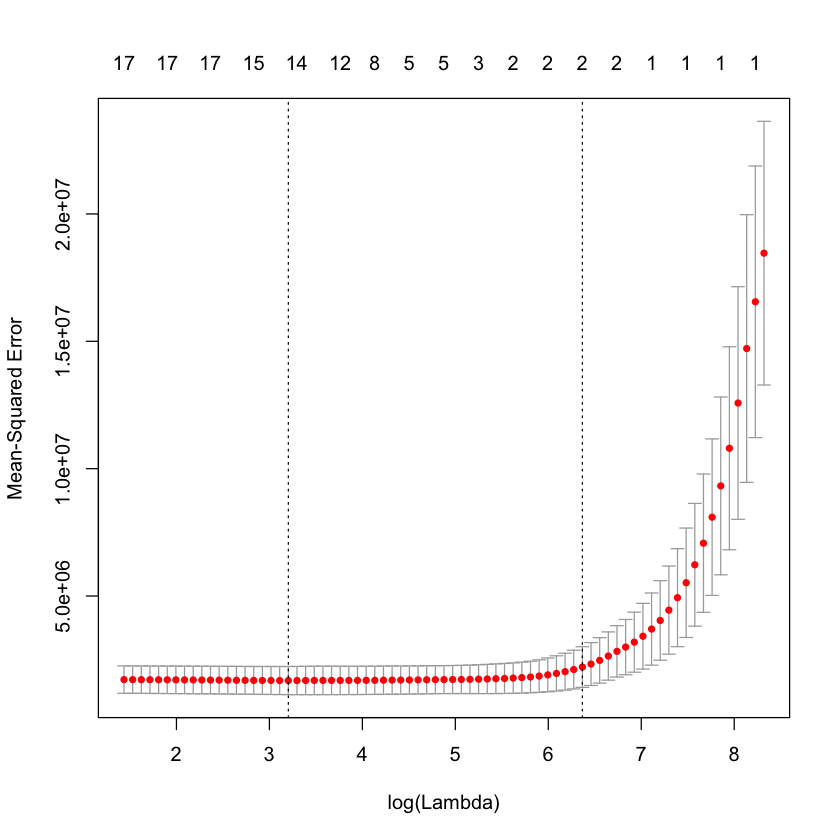

In [80]:
set.seed(1)
cv.lasso = cv.glmnet(x[train_idx,], y[train_idx], alpha=1)
plot(cv.lasso)
bestlam_lasso = cv.lasso$lambda.min

lasso.mod = glmnet(x[train_idx,], y[train_idx], alpha=1, lambda=bestlam_lasso)

In [81]:
lasso.pred <- predict(lasso.mod, s=bestlam_lasso, newx=x[-train_idx,])
lasso_test_err <- mean((lasso.pred - y[-train_idx])^2)

In [82]:
coefs <-predict(lasso.mod, type="coefficients", s=bestlam_lasso)
nnzero(coefs)

[1] 16

In [83]:
#e)
library(pls)
set.seed(2)
pcr.fit = pcr(Apps~., data=College, scale=TRUE, validation="CV")
summary(pcr.fit)

Data: 	X dimension: 777 17 
	Y dimension: 777 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3873     3837     2022     2028     1796     1584     1579
adjCV         3873     3837     2021     2028     1733     1576     1576
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1575     1539     1494      1484      1488      1488      1490
adjCV     1571     1533     1492      1482      1485      1485      1488
       14 comps  15 comps  16 comps  17 comps
CV         1489      1450      1162      1131
adjCV      1486      1437      1156      1125

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.670    57.30    64.30    69.90    75.39    80.38    83.99    87.40
Apps    2.316    73.06    73.07    82.08    84.08    84.11    84.32    85.1

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     4179     2364     2374     1996     1844     1845
adjCV         4335     4182     2360     2374     1788     1831     1838
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1850     1863     1809      1809      1812      1815      1825
adjCV     1844     1857     1801      1800      1804      1808      1817
       14 comps  15 comps  16 comps  17 comps
CV         1810      1823      1273      1281
adjCV      1806      1789      1260      1268

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.216    57.68    64.73    70.55    76.33    81.30    85.01    88.40
Apps    6.976    71.47    71.58    83.32    83.44    83.45    83.46    83.4

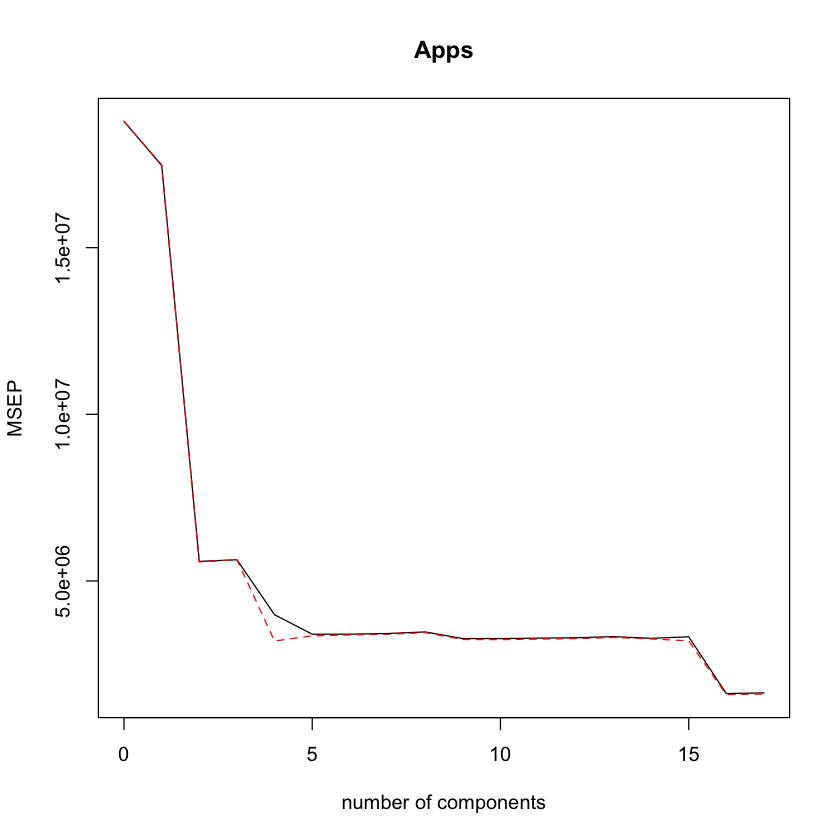

In [84]:
set.seed(1)
pcr.fit = pcr(Apps~., data=College, scale=TRUE, subset=train_idx, validation="CV")
validationplot(pcr.fit, val.type="MSEP")
summary(pcr.fit)

In [85]:
pcr.pred = predict(pcr.fit, x[-train_idx,], ncomp=5)
pcr_test_err <- mean((pcr.pred-y[-train_idx])^2)
#M=5-ish

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4335     2176     1893     1725     1613     1406     1312
adjCV         4335     2171     1884     1715     1578     1375     1295
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1297     1285     1280      1278      1279      1282      1281
adjCV     1281     1271     1267      1265      1266      1269      1268
       14 comps  15 comps  16 comps  17 comps
CV         1281      1281      1281      1281
adjCV      1267      1267      1268      1268

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.91    43.08    63.26    65.16    68.50    73.75    76.10    79.03
Apps    76.64    83.93    87.14    91.90    93.49    93.85    93.91    

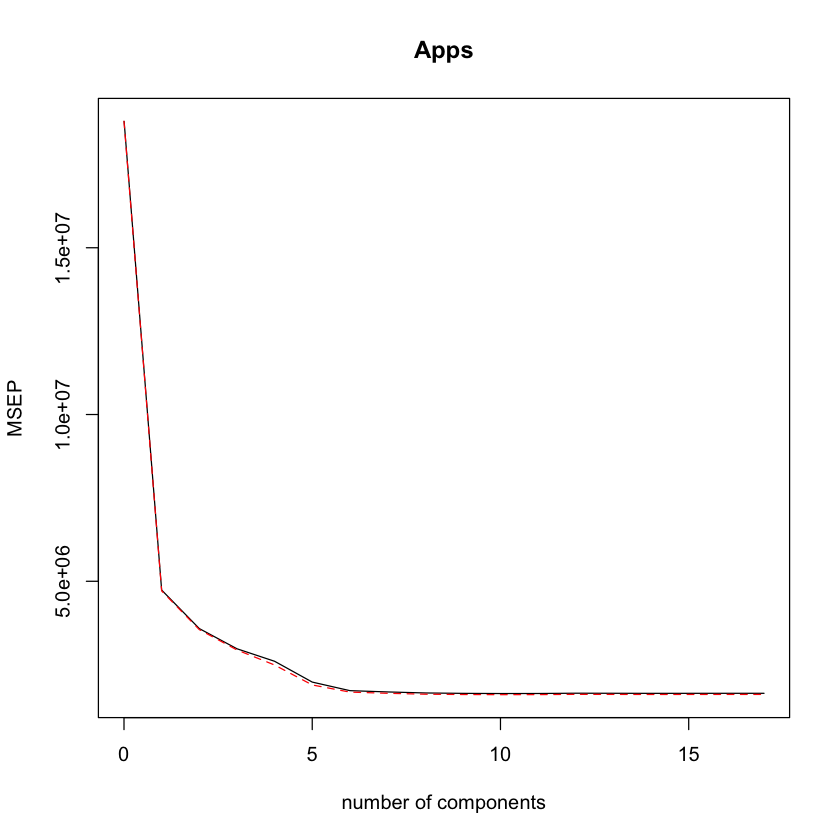

In [86]:
#f)
set.seed(1)
plsr.fit = plsr(Apps~., data=College, scale=TRUE, subset=train_idx, validation="CV")
validationplot(plsr.fit, val.type="MSEP")
summary(plsr.fit)

#~5 components. 

In [95]:
pls.pred = predict(plsr.fit, x[-train_idx,], ncomp=7)
pls_test_err <- mean((plsr.pred-y[-train_idx])^2)

In [112]:
#better to cast these test MSEs as r^2 
(all_tst_err <- c(plsr_test_err, pcr_test_err, lasso_test_err,ridge_test_err,ls_test_err))

[1] 1134225 1907827 1034786 1038427 1108531

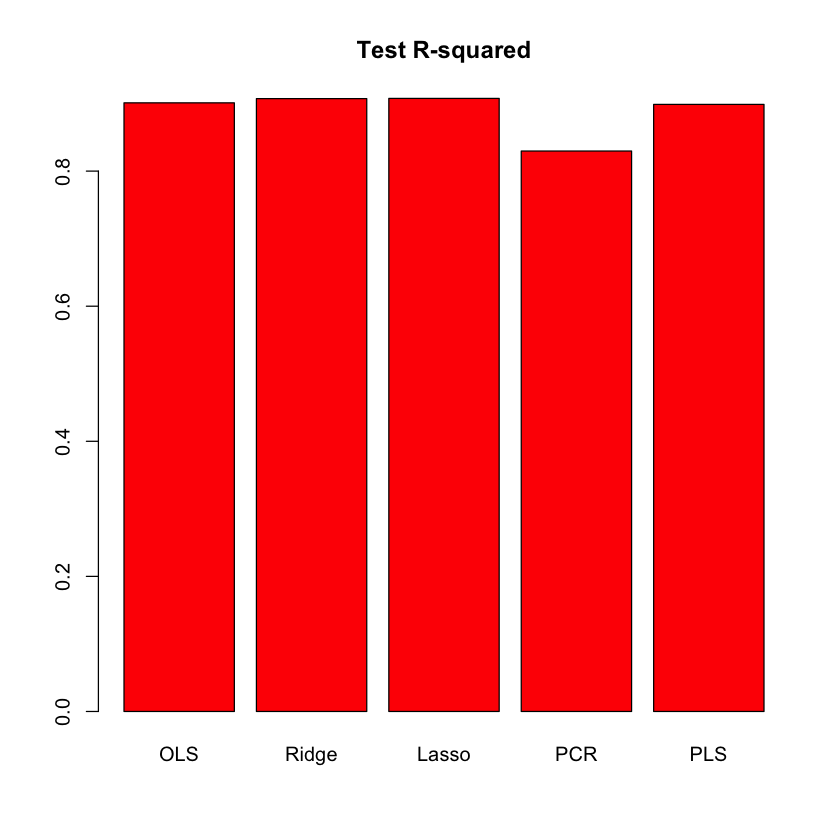

In [113]:
# 6.9g
test.avg = mean(test_samples$Apps)
lm.test.r2 = 1 - mean((test_samples$Apps - lm.pred)^2) /mean((test_samples$Apps - test.avg)^2)
ridge.test.r2 = 1 - mean((test_samples$Apps - ridge.pred)^2) /mean((test_samples$Apps - test.avg)^2)
lasso.test.r2 = 1 - mean((test_samples$Apps - lasso.pred)^2) /mean((test_samples$Apps - test.avg)^2)
pcr.test.r2 = 1 - mean((test_samples$Apps - pcr.pred)^2) /mean((test_samples$Apps - test.avg)^2)
pls.test.r2 = 1 - mean((test_samples$Apps - pls.pred)^2) /mean((test_samples$Apps - test.avg)^2)

barplot(c(lm.test.r2, ridge.test.r2, lasso.test.r2, pcr.test.r2, pls.test.r2), col="red", names.arg=c("OLS", "Ridge", "Lasso", "PCR", "PLS"), main="Test R-squared")

All of these methods except principal component regression (PCR) predict the number of applications received approximately equally well, with a test $R^2$ of ~.90. PCR ha
s a slightly worse test $R^2$ of ~.83. 